## Data preprocessing :

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [9]:
#  downloading files

import wget
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names'
wget.download(url, 'kddcup.names')
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz'
wget.download(url)
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
wget.download(url)
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.newtestdata_10_percent_unlabeled.gz'
wget.download(url)
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled.gz'
wget.download(url)
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled_10_percent.gz'
wget.download(url)
url = 'http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz'
wget.download(url)
url = 'http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types'
wget.download(url)
url = 'http://kdd.ics.uci.edu/databases/kddcup99/typo-correction.txt'
wget.download(url)


'typo-correction.txt'

### Adding Columns

In [10]:
with open("./kddcup.names") as f :
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [11]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [12]:
with open("./training_attack_types") as f :
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [13]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

### Loading the Data :

In [14]:
df = pd.read_csv("./kddcup.data_10_percent.gz", names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal
494020,0,tcp,http,SF,219,1234,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal


In [15]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [16]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [17]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

no null values !

### CATEGORICAL FEATURES

In [18]:
#extracting categorical features
num_cols = df._get_numeric_data().columns
cat_cols = list(set(df.columns)-set(num_cols))
cat_cols.remove('target')
cat_cols.remove('Attack Type')
cat_cols

['service', 'protocol_type', 'flag']

Features visualisation :

<Axes: title={'center': 'Count of Protocol Types'}, xlabel='protocol_type', ylabel='Count'>

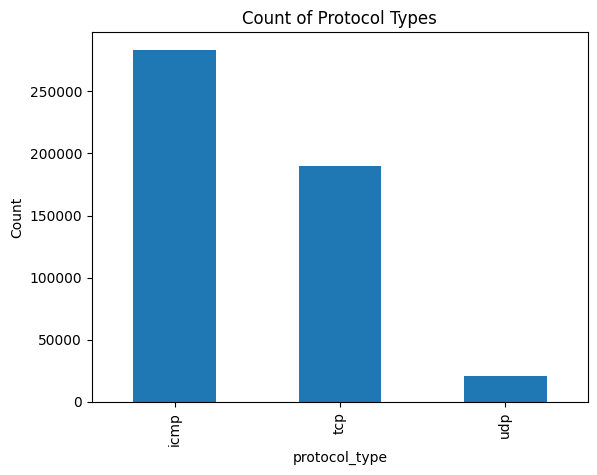

In [19]:

plt.ylabel('Count')
plt.title('Count of Protocol Types')
df['protocol_type'].value_counts().plot(kind="bar")


<Axes: xlabel='flag'>

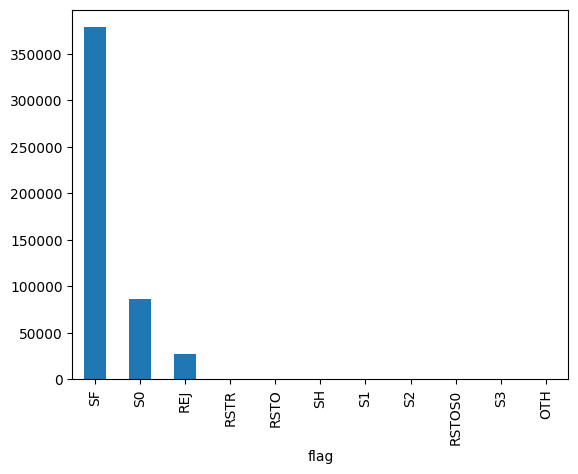

In [20]:
df['flag'].value_counts().plot(kind="bar")

<Axes: xlabel='service'>

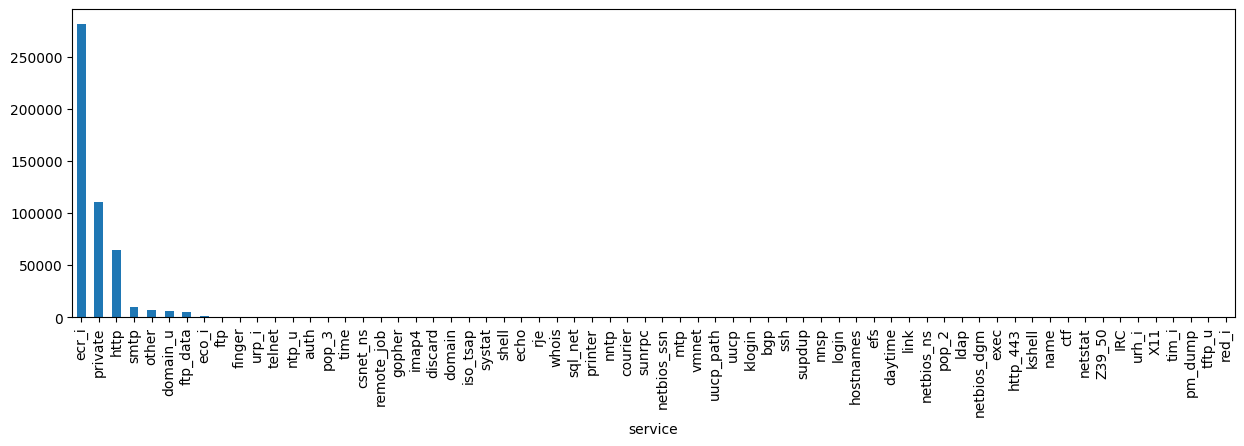

In [21]:
plt.figure(figsize=(15, 4))
df['service'].value_counts().plot(kind="bar")

<Axes: xlabel='target'>

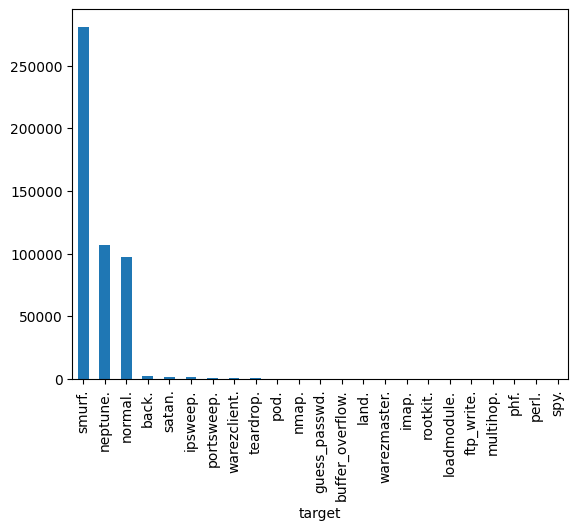

In [22]:
df['target'].value_counts().plot(kind="bar")

<Axes: xlabel='Attack Type'>

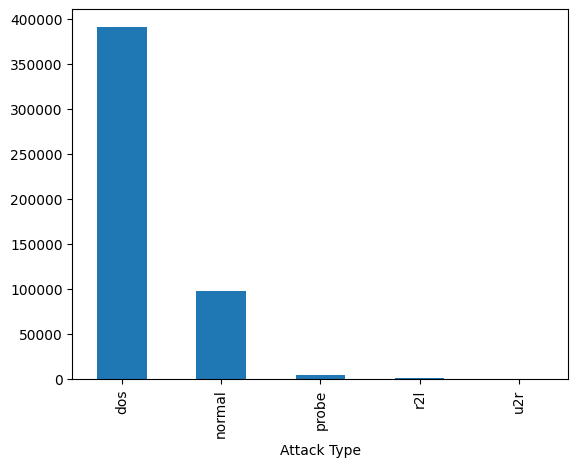

In [23]:
df['Attack Type'].value_counts().plot(kind="bar")

### Features mapping :

In [24]:
df['protocol_type'].value_counts()

protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

In [25]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [26]:
df['flag'].value_counts()

flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64

In [27]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [28]:
df.drop('service',axis = 1,inplace= True)

In [29]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


### Data correlation :

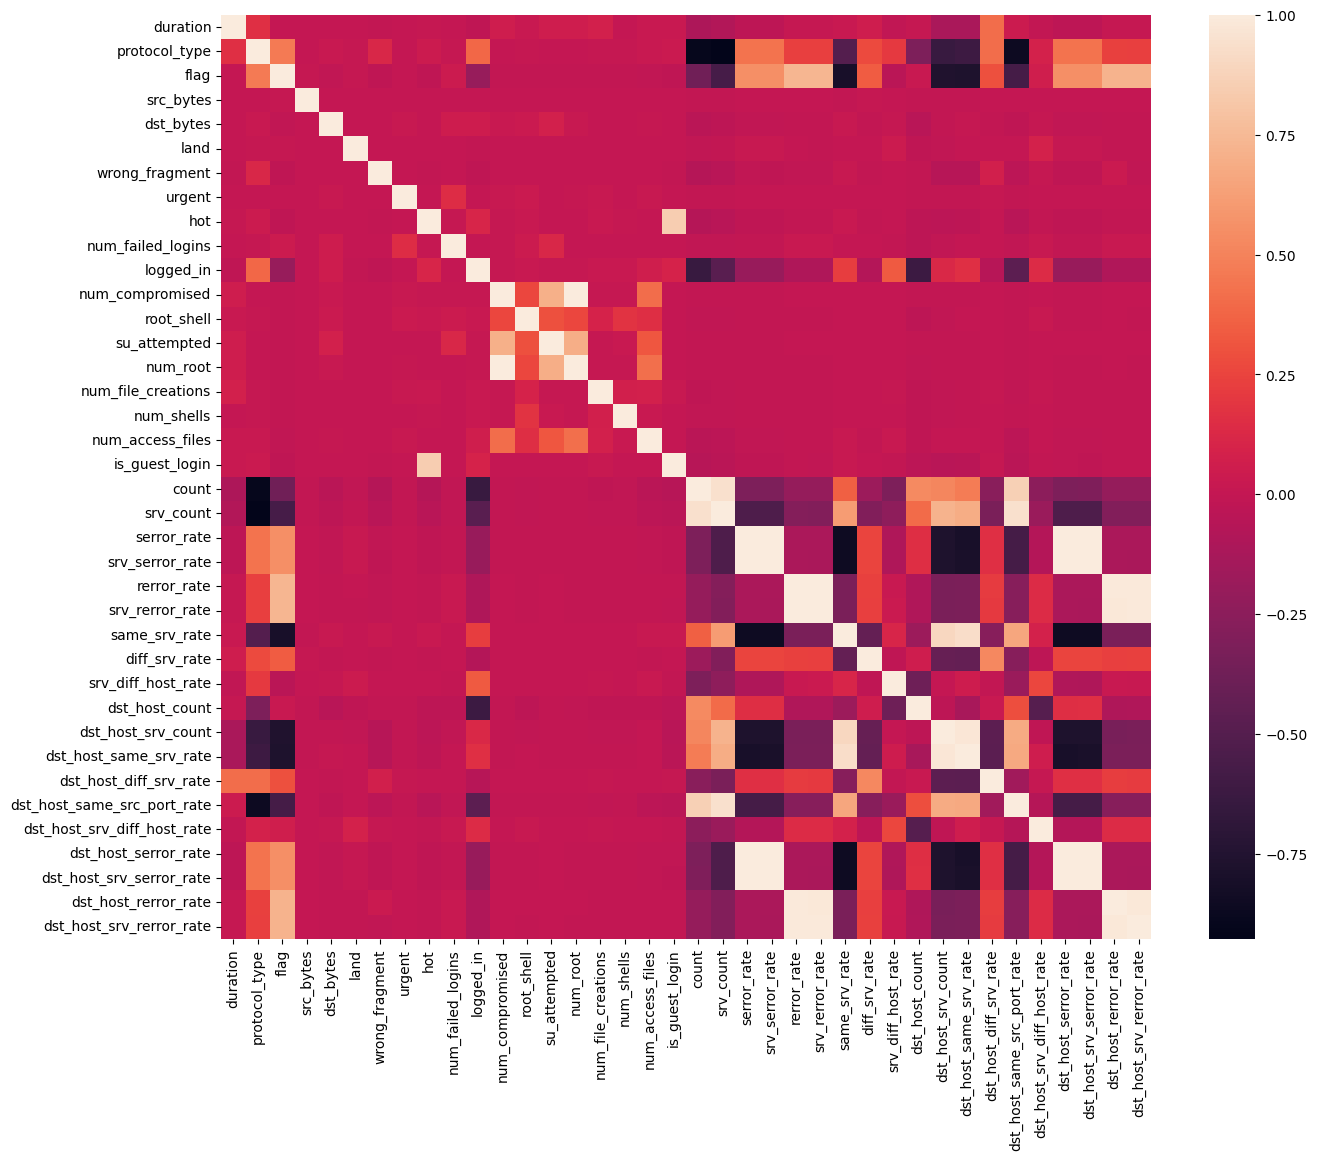

In [30]:
df = df.dropna(axis=1) # drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

df2 = df.copy()

df2.drop('Attack Type', axis=1, inplace=True)
df2.drop('target', axis=1, inplace=True)


corr = df2.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

We ensure that some features are correlated so we can remove one of them, which will not be considered in the analysis.

In [31]:
df['serror_rate'].corr(df['srv_serror_rate'])

0.9983615072725587

In [32]:
df['num_compromised'].corr(df['num_root'])

0.9938277978738128

In [33]:
df['rerror_rate'].corr(df['srv_rerror_rate'])

0.9947309539818194

In [34]:
df['dst_host_serror_rate'].corr(df['dst_host_srv_serror_rate'])

0.9981559173373277

In [35]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110385

In [36]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680105016

In [37]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679914

After verification, we can remove some features from the dataframe :

In [38]:
df.drop(['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate',
         'dst_host_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
         'dst_host_same_srv_rate'], axis=1, inplace=True)

In [39]:
df.shape

(494021, 32)

## Modeling

In [40]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [42]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(345814, 30) (148207, 30)
(345814, 1) (148207, 1)


### Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
model1 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

training

In [45]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.9058566093444824


Testing

In [46]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.02764439582824707


In [47]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.9905122406842986
Test score is: 0.990681951594729


### LOGISTIC REGRESSION


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model2 = LogisticRegression(max_iter=1200000)

In [50]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  5.248854637145996


In [51]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.036458492279052734


In [52]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9935196377243258
Test score is: 0.9935630570755767


### RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model3 = RandomForestClassifier(n_estimators=30)

In [55]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  7.261529207229614


In [56]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.45662760734558105


In [57]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999739744486921
Test score is: 0.9996558866990088


### GRADIENT BOOSTING CLASSIFIER

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
model4 = GradientBoostingClassifier(random_state=0)

In [60]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  440.5588958263397


In [61]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  2.187798261642456


In [62]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.998797041183989
Test score is: 0.9986302941156625


### SUPPORT VECTOR MACHINE

In [63]:
from sklearn.svm import SVC

In [64]:
model5 = SVC(gamma = 'scale')

In [65]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [66]:
print("Training time: ",end_time-start_time)

Training time:  861.5959801673889


In [67]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  96.39655947685242


In [68]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:", model5.score(X_test,Y_test))

Train score is: 0.9987565569930656
Test score is: 0.9988124717455991


## Evaluation

### Testing accuracy

<BarContainer object of 5 artists>

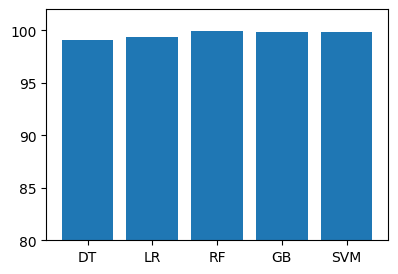

In [69]:
names = ['DT','LR','RF','GB','SVM',]
values = [99.06,99.35,99.96,99.86,99.88]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [70]:
# classification models evaluation using F1 score

from sklearn.metrics import f1_score

print("F1-score of Decision Tree is: ", f1_score(Y_test, Y_test_pred1, average='weighted'))
print("F1-score of Logistic Regression is: ", f1_score(Y_test, Y_test_pred2, average='weighted'))
print("F1-score of Random Forest is: ", f1_score(Y_test, Y_test_pred3, average='weighted'))
print("F1-score of Gradient Boosting is: ", f1_score(Y_test, Y_test_pred4, average='weighted'))
print("F1-score of SVM is: ", f1_score(Y_test, Y_test_pred5, average='weighted'))


F1-score of Decision Tree is:  0.9901724301209999
F1-score of Logistic Regression is:  0.993558926877191
F1-score of Random Forest is:  0.9996511102024355
F1-score of Gradient Boosting is:  0.9986741789771246
F1-score of SVM is:  0.9988049240548048


In [71]:
# models evaluation using recall

from sklearn.metrics import recall_score

print("Recall of Decision Tree is: ", recall_score(Y_test, Y_test_pred1, average='weighted'))
print("Recall of Logistic Regression is: ", recall_score(Y_test, Y_test_pred2, average='weighted'))
print("Recall of Random Forest is: ", recall_score(Y_test, Y_test_pred3, average='weighted'))
print("Recall of Gradient Boosting is: ", recall_score(Y_test, Y_test_pred4, average='weighted'))
print("Recall of SVM is: ", recall_score(Y_test, Y_test_pred5, average='weighted'))


Recall of Decision Tree is:  0.990681951594729
Recall of Logistic Regression is:  0.9935630570755767
Recall of Random Forest is:  0.9996558866990088
Recall of Gradient Boosting is:  0.9986302941156625
Recall of SVM is:  0.9988124717455991


In [72]:
# evaluation using precision

from sklearn.metrics import precision_score

print("Precision of Decision Tree is: ", precision_score(Y_test, Y_test_pred1, average='weighted'))
print("Precision of Logistic Regression is: ", precision_score(Y_test, Y_test_pred2, average='weighted'))
print("Precision of Random Forest is: ", precision_score(Y_test, Y_test_pred3, average='weighted'))
print("Precision of Gradient Boosting is: ", precision_score(Y_test, Y_test_pred4, average='weighted'))
print("Precision of SVM is: ", precision_score(Y_test, Y_test_pred5, average='weighted'))


c:\Users\Mouhssine\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision of Decision Tree is:  0.9902566909337823
Precision of Logistic Regression is:  0.9936577646752272
Precision of Random Forest is:  0.9996527991581233
Precision of Gradient Boosting is:  0.9987475286690605
Precision of SVM is:  0.9988039377499395


## Saving the model

In [76]:
import joblib

# Save the Random Forest model as it has the best performance
joblib.dump(model3, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [87]:

# Load the saved model
model = joblib.load('random_forest_model.pkl')

# Extract a single row from the test set as an example
example = X_test[80810]

# Reshape the example to a 2D array as the model expects a batch of samples
example_reshaped = example.reshape(1, -1)

# Make a prediction
prediction = model.predict(example_reshaped)

# Print the predicted attack type
print("Predicted Attack Type:", prediction[0])

# Verify with the actual value (optional)
actual_attack_type = Y_test.iloc[80810]['Attack Type']
print("Actual Attack Type:", actual_attack_type)


Predicted Attack Type: dos
Actual Attack Type: dos
